In [1]:
using ForwardDiff
using Turing
using Plots
using LinearAlgebra
using StatsPlots
using Optim

In [2]:
function make_fake_theory(Ωm, s8; ks=ks)
    return @.(s8+Ωm^2*ks+s8*ks^2) 
end

make_fake_theory (generic function with 1 method)

In [3]:
ks = LinRange(1, 10, 20)
data_vector = make_fake_theory(0.3, 0.81)
cov_tot = (0.1* data_vector).^2
inv_cov = cov_tot .^ -1
dett = prod(cov_tot)

8.002331985364093e11

In [4]:
function get_Xi2(Ωm, s8)
    theory = make_fake_theory(Ωm, s8)
    diff = @.(data_vector-theory)
    Xi2 = dot(diff,inv_cov.*diff) 
    return Xi2
end;

In [5]:
function get_lp(Ωm, s8)
    Xi2 = get_Xi2(Ωm, s8)
    return -0.5*Xi2-0.5*log(2*pi*dett)
end

get_lp (generic function with 1 method)

In [6]:
@model function model(data_vector::Vector{Float64})
    Ωm ~ Uniform(0.1, 1.0)
    s8 ~ Uniform(0.1, 1.0)
    theory = make_fake_theory(Ωm, s8)
    println(get_lp(Ωm, s8))
    data_vector ~ MvNormal(theory, cov_tot)
    return data_vector
end;

In [7]:
map_estimate = optimize(model(data_vector), MAP(), NelderMead())

-36.95351330261728
-36.95351330261728
-36.95351330261728
-48.345395425003026
-66.52036213742005
-29.57262711032035
-39.802135176822134
-41.544664343214336
-91.0284019916694
-211.66891799866198
-128.63011493376138
-222.66911340847514
-66.32014982435513
-41.46108597967208
-101.28593064053132
-134.99086650009048
-79.71285247389996
-70.7343866478311
-59.482200215527044
-49.408302697572545
-78.90126054144527
-65.75663169065203
-73.19733317927123
-65.89692683333567
-51.812325065631974
-45.52393634207348
-37.62626836705607
-44.23702759003852
-49.23894863500208
-32.33909748092805
-24.807507570825454
-18.335991932173748
-20.850262971631597
-17.65362096886006
-14.680286743188521
-20.561774620975957
-14.865371288205994
-19.0948260076975
-16.31481549876571
-15.051643934438042
-14.98562543028538
-15.5961988541931
-15.193289843172296
-17.13299352654647
-14.677295298978985
-14.779704672261332
-14.65366007055198
-14.907540967007305
-14.762391067566764
-14.626808657792488
-14.659260972583802
-14.632650

ModeResult with maximized lp of -45.58
2-element Named Vector{Float64}
A   │ 
────┼─────────
:Ωm │ 0.300055
:s8 │ 0.809985

In [8]:
iterations = 5000
nadapts = 1000
new_chain = sample(model(data_vector), MH(), iterations,
                   nadapt=nadapts, progress=true; save_state=true);

-71.64614404653864
-43.368531302651775
-207.06074682730002
-684.9426063709188
-20.963078369729622
-65.6447306596229
-386.654699672938
-43.49895404807054
-126.61879181064852
-237.94980225462393
-177.66354889768382
-177.05802653807734
-14.954563726581112
-78.94062458984796
-85.31137483976941
-604.9793547831389
-70.62814747531166
-59.2425418907037
-210.88066268319483
-89.4991585186064
-87.39244856486268
-16.754163282130442
-441.62096845395234
-314.64282098379584
-103.70519466075802
-15.384273889088387
-571.2850590308027
-51.03009233332404
-92.19669635962524
-219.59103960553426
-173.29792099350226
-16.809918244910794
-53.806643766673325
-79.57703764276899
-112.13371482986516
-70.24662329872895
-20.97344223282522
-14.852982091795573
-539.4731922985638
-28.21856077317765
-458.4569930475174
-329.70670466788226
-34.083572389606445
-44.800993776844216
-17.222473493901383
-14.904489059887318
-93.09804323869353
-51.540564125627895
-33.14075015103693
-372.0189082789703
-158.4726069046473
-256.7204

-16.34464674747485
-19.653230068929492
-105.71001103845408
-205.67434631197017
-58.31804746587444
-160.22932680837198
-149.91775245310055
-75.71183137831065
-415.94852513861684
-233.30976490027933
-69.90381993775037
-464.01482079832937
-223.49438509854372
-27.518013626427397
-236.8658723685607
-161.3437385138056
-247.62212460470977
-15.023715781383183
-32.58651312995265
-126.5066978317688
-37.06892337480261
-31.579725984260705
-628.3909380605334
-33.946362318321725
-44.04448810837124
-70.36834651609843
-39.939115668616424
-51.88441346366065
-18.239137966218493
-254.75465927552398
-244.36224744768356
-133.18307129848466
-490.7276599603152
-62.46719931196072
-81.16952058603508
-440.7178766014165
-58.92361929326464
-194.1994578909957
-121.06288410295136
-177.60770440765344
-19.256190739809536
-18.491698798501293
-80.32937555965947
-232.83060882399013
-59.788765946762545
-87.82838464970948
-23.090740104738813
-85.30217406045652
-169.91807610454038
-110.33353966208793
-54.53908277941395
-11

Sampling:  28%|███████████▌                             |  ETA: 0:00:00

-59.425234434517776
-15.796686575328732
-571.8910588615248
-335.36973046848226
-132.55718853982046
-48.82701646111761
-262.29652420204917
-21.352306414526964
-35.50263184162595
-387.43574296823317
-166.08317911510693
-513.7116526853025
-516.2927509968324
-145.22236221195288
-17.26550570216708
-219.63796667947935
-16.69433039812364
-131.42709789220982
-26.8195047081156
-268.9539424017144
-23.72616024219886
-111.57421934516044
-14.873065059464345
-15.795786691590447
-119.42152414772235
-409.30358664503797
-33.45388045907407
-74.51015498207362
-15.118715020557412
-434.2993320521317
-595.8922995587822
-700.9311732233558
-61.131415998813345
-355.77711418175346
-53.7259223254067
-78.88989881722597
-21.017702428428358
-16.14094666476157
-33.11833643506607
-24.35094728273119
-311.3654030372112
-671.1965796797649
-23.730799513641653
-709.9853003011153
-241.55342159692373
-196.9903787189652
-131.25452498016168
-224.93121636968584
-431.1609832954442
-106.53093745272011
-522.5203215861217
-15.8527

-45.45189856501483
-319.85857026480284
-157.14482684062125
-20.85631698401867
-435.80341886129645
-307.3828971209852
-35.245764330539814
-23.88875563071109
-33.81012694945922
-25.632717164060097
-619.0973589172941
-187.45360294892197
-184.47461447023215
-504.8491583091188
-321.8459179250918
-105.62356959763369
-100.17391170225244
-231.63268511560244
-29.088724366232654
-27.73044516907486
-353.5111252159235
-321.616954930966
-63.31921119979436
-40.7588745456689
-577.8731705231512
-480.8785507066543
-429.3876447931937
-715.0237476908304
-148.4031819114894
-44.88441443070333
-395.78062378714316
-16.746949539268016
-39.45436355571337
-26.795260133837644
-453.92719989908045
-33.81374184582948
-74.53909031772011
-472.77051609282904
-124.12626856212718
-118.86372864123373
-30.526965715286657
-38.09009931749361
-683.3069900410154
-115.29228301729546
-205.55849311179634
-60.988861357115056
-177.81531216209396
-115.59475204260377
-20.488486833646906
-184.00436575864973
-64.12103292817264
-269.66

-307.7663604133867
-21.770245154155
-27.219460834042604
-66.24825025403027
-171.2513259124292
-185.14540462251261
-27.545911757891442
-405.680018422677
-125.27428906862363
-135.70335512079097
-147.8591112483199
-18.838050322406232
-332.1582105830197
-392.0524830518913
-53.34939689742423
-42.095755697290286
-53.52429231350867
-18.73116323585686
-16.13850796167005
-61.24307489066016
-212.86076544288386
-550.7807323915018
-47.08136636454664
-95.64892489739869
-473.0455730248547
-125.7096587794219
-143.8555088266279
-505.5293263607641
-715.4015404375218
-146.54348950875885
-14.98937790858725
-39.28252582345708
-53.41818389842246
-176.4119693362544
-40.424376079903425
-308.50318993226426
-29.79654941625362
-567.6898373369916
-35.79950151196475
-37.66868905555164
-15.69181952691033
-82.26385477329849
-28.210223292738803
-469.6372667435648
-26.427135488500415
-101.73718558288371
-624.7412522941235
-67.66228304894048
-32.070605417827075
-19.106265338040835
-17.25350887486259
-39.5721242374655


-117.63656695324822
-21.85632939753776
-16.604219330006604
-84.59566598775281
-35.276325991186695
-117.89228112939416
-467.5434352312553
-341.513899398268
-70.15849854556082
-39.88516545191477
-133.81232810853334
-406.5980335462584
-506.8221245067283
-27.755938114575557
-262.94993222096195
-354.15389095962735
-100.38805732081825
-120.53376761310356
-55.48351689405206
-313.0323712825469
-20.446208534480935
-61.72636800346026
-392.4420965845692
-330.4394379915326
-232.77147023931576
-106.66295822533306
-118.91195139482454
-367.8455881268824
-83.45972935959489
-164.31411145766447
-108.5355683793573
-209.8405199373093
-331.4055372955721
-87.20236806796802
-119.65035739048633
-21.80095089502733
-603.0758852051168
-198.8180995367407
-347.8222277764339
-129.69412586769477
-353.7248026844062
-216.98207366427704
-29.879139308248774
-127.80951972769095
-14.840958621143034
-442.5572453580744
-187.8805802167292
-94.64629954737237
-43.187920397303174
-307.6335121139495
-86.12126000547005
-446.13275

-66.22960793192391
-669.3713411183804
-54.1581698334428
-583.1059447146333
-15.65118178839109
-90.1865732047401
-26.523776963242593
-27.25603264176646
-91.87975755855297
-139.82147041874305
-443.3604991266377
-510.32888049165865
-45.70226444761738
-122.497625709851
-588.7519957694068
-23.75572730259101
-46.96755336776469
-357.37673150818335
-372.7839569445558
-47.819532485265455
-23.19984551190735
-139.57315044171898
-64.73293762783942
-90.78159654777694
-19.34428523594229
-475.5222479998456
-104.02176278324052
-79.92952809462712
-18.43764128628968
-570.0680958114629
-20.7562129557209
-455.1618579976326
-26.81350537956396
-106.63442411105099
-416.25708821207587
-58.177856587000015
-156.30701096807212
-126.47409167726224
-22.173015790420816
-43.27162492870968
-51.246558582596855
-66.62606917469
-95.92194680718424
-270.0138478602551
-291.16760331298605
-74.21254766272543
-178.42689350061897
-109.47173046840314
-14.905819963169426
-627.8997140156177
-44.96687589607943
-259.6407195304292
-

-22.07382881067722
-360.5769690132059
-142.04993627181992
-60.41541175962644
-109.37059116357356
-375.0285265200087
-70.53484993776976
-554.9149713076729
-44.828319548251116
-123.89787404680648
-107.22819484133471
-381.9504096039396
-66.03680125881476
-78.17654714753905
-26.78584530815219
-536.8910735578174
-16.697332684711302
-619.2759411741029
-376.5946912844853
-111.0882674230963
-41.883852017271096
-28.349382828652146
-235.33637490155684
-342.59091422805193
-145.7321899399248
-18.199796042729638
-41.531217021923325
-111.90129766085754
-35.71809719778102
-456.79948711318235
-386.7268040305893
-40.155138382770176
-17.011907732369732
-43.699986245055214
-121.45347837889203
-34.860624274525236
-70.71690759816823
-44.9392472784708
-40.281052049077715
-374.77552170719986
-436.14488371627266
-99.09737054626896
-678.7773372688429
-46.62176321330135
-45.371056322220696
-131.18785615427385
-74.46960666431099
-24.443410408540753
-111.47739408560705
-107.69933391646887
-401.09017049176157
-251

-38.038242143538895
-19.68716396658222
-47.93105106672937
-202.19061249247954
-35.68307513524738
-72.31408851794686
-27.15708071342658
-14.652805253178837
-14.675244928396992
-17.097471910631523
-77.70987180109887
-396.1997700552581
-23.630063453133445
-495.4993659111422
-18.785347483867973
-111.86021791152966
-17.148625011039666
-28.22494957870648
-42.952128267520116
-558.5559261994792
-139.63605488652334
-270.5432995446
-432.17795882741717
-88.65337288347607
-95.22899306791189
-85.4225494328782
-285.17636181022385
-50.10560832761422
-118.51141331449375
-47.96443864990774
-195.8890972904473
-87.614818160024
-30.443511490904893
-90.20119649958336
-125.09727628949715
-541.2018732519913
-117.99076488976453
-32.919551280138364
-24.62676838869521
-509.75997403153895
-29.207708953338464
-158.55564005089047
-106.52770316972877
-304.103559243897
-165.47435791336136
-24.775323069258103
-45.19007110669479
-16.013280501512387
-177.02520614799437
-37.4733707016929
-174.57302346845034
-22.93964385

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


-600.3321633053353
-27.67166155832416
-16.1642589577142
-24.907646756583464
-15.049329768351587
-118.98700200368704
-527.1626104207515
-475.66045517372714
-232.59150883552383
-371.3220098865679
-186.7764030225788
-79.93435169055135
-108.8976251448794
-452.56548549877994
-34.38545693322378
-28.97469647726546
-335.4871007341051
-23.826814975719383
-15.233381405001714
-311.2556200576183
-16.503216456063075
-466.6733661298353
-21.276136120836142
-72.14175608516197
-68.26230671444969
-415.4111609689193
-49.25106129868363
-67.01991247453077
-68.68296630529585
-307.4188907601659
-33.34210281790956
-195.47609791798726
-87.14875563447308
-421.78085204595243
-367.1933517154367
-15.40353907975857
-87.75018429136655
-546.863622576867
-522.6377693956133
-35.768388393153835
-575.116389788246
-41.000316328511985
-108.02473543717619
-47.57886514314334
-425.7685775813151
-196.534764403436
-186.660218674843
-17.253520310556716
-194.61958106387033
-237.3656321850013
-290.4112042965497
-58.089122516137664

In [9]:
describe(new_chain)[1]

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat   es ⋯
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64      ⋯

          Ωm    0.2995    0.1235     0.0017    0.0106   68.9854    1.0200      ⋯
          s8    0.8043    0.0398     0.0006    0.0032   92.2308    1.0118      ⋯
                                                                1 column omitted


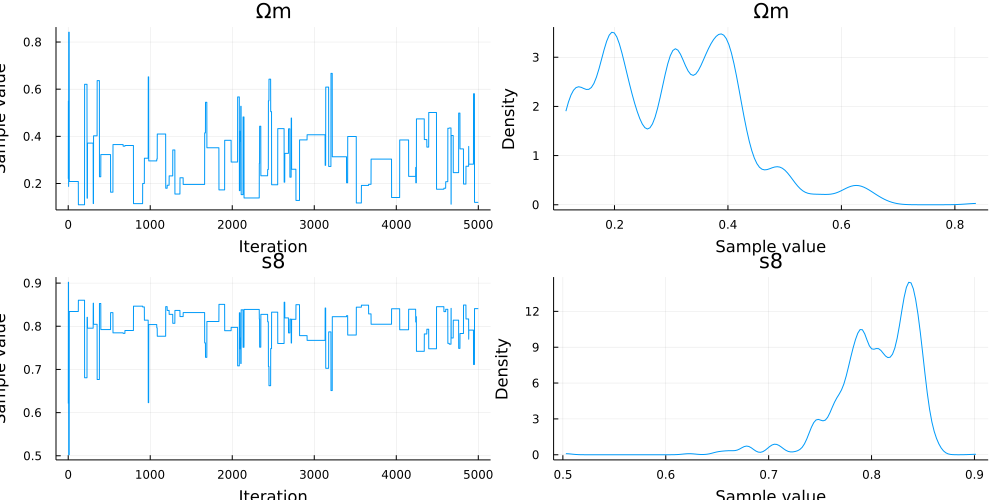

In [10]:
plot(new_chain)

In [11]:
vals = get(new_chain, [:Ωm, :s8, :lp])

(s8 = [0.6210054249122631; 0.9019232349212772; … ; 0.84083895204507; 0.84083895204507;;], lp = [-228.97339657812927; -197.8657314750941; … ; -45.75841580151796; -45.75841580151796;;], Ωm = [0.22017285742121803; 0.5498232130856184; … ; 0.1202281942565292; 0.1202281942565292;;])

In [12]:
Wms = LinRange(0.1, 1.0, 100)
s8s = LinRange(0.1, 1.0, 100)

100-element LinRange{Float64, Int64}:
 0.1,0.109091,0.118182,0.127273,0.136364,…,0.972727,0.981818,0.990909,1.0

In [13]:
Xi2s = [get_Xi2(Wm, s8) for Wm in Wms, s8 in s8s];

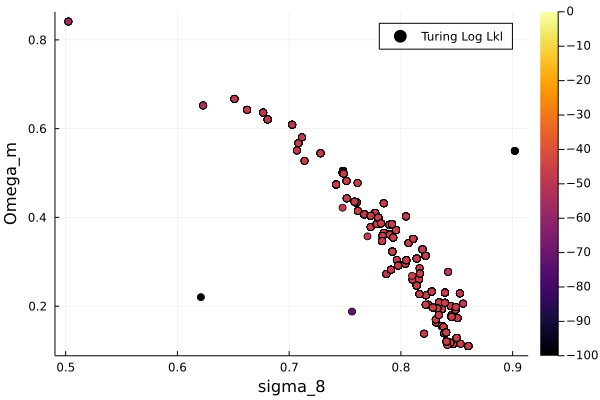

In [14]:
scatter(vals.s8, vals.Ωm, marker_z = vals.lp, clim = (-100, 0), label="Turing Log Lkl",
        ylabel="Omega_m", xlabel="sigma_8")

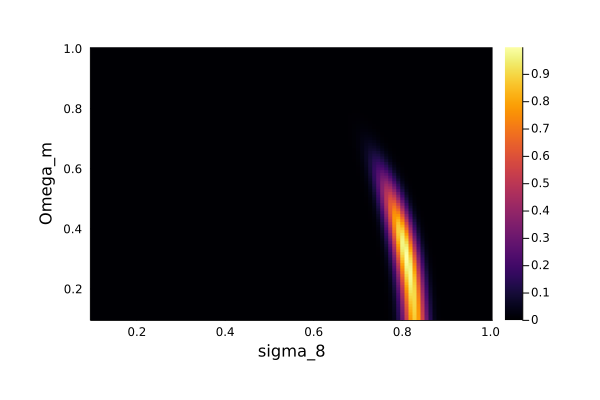

In [15]:
using Plots.PlotMeasures
heatmap(s8s, Wms, @.(exp(-0.5 .* Xi2s)), label="Analytic Log Lkl",
    ylabel="Omega_m", xlabel="sigma_8", margin=10mm)

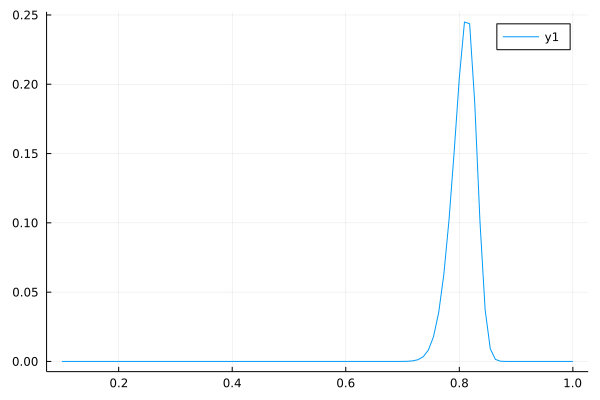

In [16]:
plot(s8s, mean(@.(exp(-Xi2s)), dims=1)[1,:])

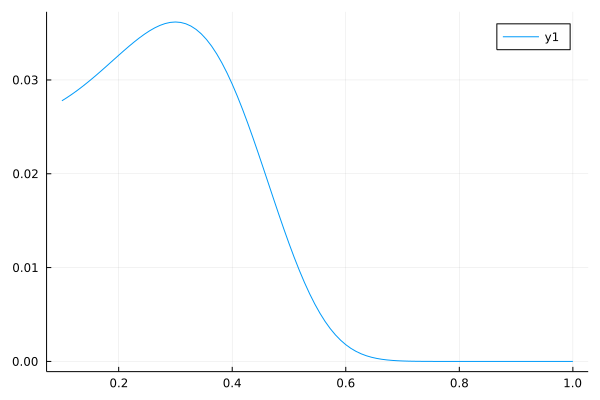

In [17]:
plot(Wms, mean(transpose(@.(exp(-Xi2s))), dims=1)[1,:])